In [2]:
import pysam
import numpy as np
import pandas as pd
import os
from glob import glob
import re
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython
%matplotlib inline 
import collections 
#%R -i importance

In [3]:
#读取原始文件
def read_raw_data():
    pwd=os.getcwd()
    raw_data_path=os.listdir(pwd+"/raw_data")
    files=locals()
    raw_data={}
    for file in raw_data_path:
        files[file[:-4]+"_raw"]=pd.read_csv("raw_data/"+file,sep="\t")
        raw_data.update({file[:-4]+"_raw":files[file[:-4]+"_raw"]})
    ##查看生成的变量
    local=locals().keys()
    print [i for i in local if re.findall(r'^.*raw$',i)]
    return raw_data
raw_data=read_raw_data()

['Curated Benign_raw', 'Pathogenic_raw', 'Benigh_raw', 'Curated Pathogenic_raw']


In [4]:
raw_data['Curated Benign_raw']

,#bin,chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,attrCount,attrTags,attrVals
0,26,chr1,148867550,149768855,nssv1184521,0,.,148867550,149768855,15,"ID,Name,Alias,parent,Dbxref,Start_range,End_ra...","319,nssv1184521,ISCA_3_INST_6,nsv491526,URL:ww..."
1,26,chr1,148867550,149768855,nssv1184520,0,.,148867550,149768855,15,"ID,Name,Alias,parent,Dbxref,Start_range,End_ra...","318,nssv1184520,ISCA_3_INST_5,nsv491526,URL:ww..."
2,178,chr2,110879905,110962594,nssv13656568,0,.,110879905,110962594,15,"ID,Name,Alias,parent,Dbxref,Start_range,End_ra...","649,nssv13656568,ISCA_2016-07-20_UPDATE_15,nsv..."
3,304,chr2,242930599,243102476,nssv1184568,0,.,242930599,243102476,15,"ID,Name,Alias,parent,Dbxref,Start_range,End_ra...","359,nssv1184568,ISCA_3_INST_54,nsv491583,URL:w..."
4,304,chr2,242930599,243102476,nssv1184567,0,.,242930599,243102476,15,"ID,Name,Alias,parent,Dbxref,Start_range,End_ra...","358,nssv1184567,ISCA_3_INST_53,nsv491583,URL:w..."
5,73,chr6,259527,339802,nssv1184581,0,.,259527,339802,15,"ID,Name,Alias,parent,Dbxref,Start_range,End_ra...","371,nssv1184581,ISCA_3_INST_67,nsv491521,URL:w..."
6,73,chr6,259527,339802,nssv1184580,0,.,259527,339802,15,"ID,Name,Alias,parent,Dbxref,Start_range,End_ra...","370,nssv1184580,ISCA_3_INST_66,nsv491521,URL:w..."
7,9,chr8,7053185,8130689,nssv1184586,0,.,7053185,8130689,15,"ID,Name,Alias,parent,Dbxref,Start_range,End_ra...","376,nssv1184586,ISCA_3_INST_72,nsv491532,URL:w..."
8,9,chr8,7053185,8130689,nssv1184585,0,.,7053185,8130689,15,"ID,Name,Alias,parent,Dbxref,Start_range,End_ra...","375,nssv1184585,ISCA_3_INST_71,nsv491532,URL:w..."
9,14,chr8,42608155,43528350,nssv1184588,0,.,42608155,43528350,15,"ID,Name,Alias,parent,Dbxref,Start_range,End_ra...","378,nssv1184588,ISCA_3_INST_74,nsv491542,URL:w..."


In [3]:
#人种频率特征生成
def Frequency_sum(raw_data)
    data=raw_data
    chr=data["chrom"].map(lambda x : x[3:])
    start=data["chromStart"]
    end=data["chromEnd"]
    Id=data["name"]
    tabixfile_ethnicity = pysam.Tabixfile("./db/ethnicity_frequency.txt.gz")
    colnames=[i.split("\t") for i in list(pd.read_csv("./db/ethnicity_frequency.txt.gz",nrows=1,header=None)[0])][0]    #读取ljb26注释文件的列名
    Full_frame=pd.DataFrame()
    for i in range(data.shape[0]):
        
        Single_frame=[]
        for tabix_row in tabixfile_ethnicity.fetch(chr[i],start[i],end[i]):
            Single_frame.append(tabix_row.split("\t"))
        Single_frame=pd.DataFrame(Single_frame,columns=colnames)
        Single_frame["End"]=map(int,Single_frame["End"])
        Single_result =collections.OrderedDict()
        Single_result["Chr"]=chr[i]
        Single_result["Start"]=start[i]
        Single_result["End"]=end[i]
        Single_result["Id"]=Id[i]
        for column in colnames[3:]:
            Single_result[column]=float(0)
        if Single_frame.shape[0]==0:
            Full_frame=Full_frame.append(pd.DataFrame(Single_result,index=[0]),sort=False)
        else:
            for column in colnames[3:]:
                Single_result[column]=sum(Single_frame[column].map(lambda x:float(x)))
        Full_frame=Full_frame.append(pd.DataFrame(Single_result,index=[0]),sort=False)
    Full_frame.columns=Full_frame.columns[:4].append("EthFrequency_"+Full_frame.columns[4:])
    #(Single_frame.loc[:,'European (Non-Finnish)':]).apply(lambda x:sum(x.map(float)))
    return Full_frame

SyntaxError: invalid syntax (<ipython-input-3-6ec92a46b651>, line 2)

In [5]:
#载入hg19_ljb26_all.vcf注释文件(需要提前建立索引)
tabixfile = pysam.Tabixfile("./db/hg19_ljb26_all.vcf.gz")
#左右断点SCORE
def Breakpoint_score(raw_data,left_OR_right,distance=5):
    if left_OR_right not in ["Left","Right"]:
        return "left_OR_right must be 'Left'、'Right' "
    from collections import Counter
    data=raw_data
    colnames=[i.split("\t") for i in list(pd.read_csv("db/hg19_ljb26_all.vcf.gz",nrows=1,header=None)[0])][0]    #读取ljb26注释文件的列名
    #data.index=["Pathogenic_%d" %(i) for i in range(data.shape[0])]
    
    chr=data["chrom"].map(lambda x : x[3:])
    start=data["chromStart"]
    end=data["chromEnd"]
    Id=data["name"]
    Full_frame=pd.DataFrame()
    for i in range(data.shape[0]):
        print i
        Single_frame=[]
        if left_OR_right=="Left":
            for tabix_row in tabixfile.fetch(chr[i],start[i]-distance,start[i]+distance):
                Single_frame.append(tabix_row.split("\t"))
        else:
            for tabix_row in tabixfile.fetch(chr[i],end[i]-distance,end[i]+distance):
                Single_frame.append(tabix_row.split("\t"))
        Single_frame=pd.DataFrame(Single_frame,columns=colnames)
        Single_result =collections.OrderedDict()
        Single_result["Chr"]=chr[i]
        Single_result["Start"]=start[i]
        Single_result["End"]=end[i]
        Single_result["Id"]=Id[i]
        if Single_frame.shape[0]==0:
            Full_frame=Full_frame.append(pd.DataFrame(Single_result,index=[0]),sort=False) 
        else:
        #定义顺序字典
            for column in colnames[5:]:
            #为字符型的列
                if column in ["SIFT_pred",'Polyphen2_HDIV_pred','Polyphen2_HVAR_pred','LRT_pred','RadialSVM_pred','LR_pred',"MutationTaster_pred","FATHMM_pred","RadialSVM_pred"]:
                    #全部都是空
                    if set(Single_frame[column])=={'.'}:
                        Single_result[column]=np.nan
                    else:
                        #计算D的数量
                        try:
                            Single_result[column]=dict(Counter(Single_frame[column]))["D"]
                        #没有D的情况
                        except KeyError:
                            Single_result[column]=0
                elif column in ["MutationAssessor_pred"]:
                    if set(Single_frame[column])=={'.'}:
                        Single_result[column]=np.nan
                    else:
                        try:
                            Single_result[column]=dict(Counter(Single_frame[column]))["L"]
                        except KeyError:
                            Single_result[column]=0
                #数字型的列
                else:
                    if set(Single_frame[column])=={'.'}:
                        Single_result[column]=np.nan
                    else:
                        Single_frame[column]=Single_frame[column].replace(".",0)
                        Single_result[column]=sum(Single_frame[column].map(lambda x:float(x)))            
            Full_frame=Full_frame.append(pd.DataFrame(Single_result,index=[0]),sort=False)
    Full_frame.columns=Full_frame.columns[:4].append(left_OR_right+"_"+Full_frame.columns[4:])
    return Full_frame


#中间SUM—SCORE
def Sum_score(raw_data):
    import datetime
    starttime = datetime.datetime.now()
    
    from collections import Counter
    data=raw_data
    colnames=[i.split("\t") for i in list(pd.read_csv("db/hg19_ljb26_all.vcf.gz",nrows=1,header=None)[0])][0]
    #data.index=["Pathogenic_%d" %(i) for i in range(data.shape[0])]
    chr=data["chrom"].map(lambda x : x[3:])
    start=data["chromStart"]
    end=data["chromEnd"]
    Id=data["name"]
    type=data['attrVals'].map(lambda x :x.split(",")[-2][-4:])
    Full_frame=pd.DataFrame()
    for i in range(data.shape[0]):
        print i
        Single_frame=[]
        for tabix_row in tabixfile.fetch(chr[i],start[i],end[i]):
            Single_frame.append(tabix_row.split("\t"))
        Single_frame=pd.DataFrame(Single_frame,columns=colnames)
        Single_result =collections.OrderedDict()
        Single_result["Chr"]=chr[i]
        Single_result["Start"]=start[i]
        Single_result["End"]=end[i]
        Single_result["Id"]=Id[i]
        if Single_frame.shape[0]==0 or type[i]=="gain":
            Full_frame=Full_frame.append(pd.DataFrame(Single_result,index=[0]),sort=False) 
        elif type[i]=="loss":
        #定义顺序字典
            for column in colnames[5:]:
            #为字符型的列
                if column in ["SIFT_pred",'Polyphen2_HDIV_pred','Polyphen2_HVAR_pred','LRT_pred','RadialSVM_pred','LR_pred',"MutationTaster_pred","FATHMM_pred","RadialSVM_pred"]:
                    #全部都是空
                    if set(Single_frame[column])=={'.'}:
                        Single_result[column]=np.nan
                    else:
                        #计算D的数量
                        try:
                            Single_result[column]=dict(Counter(Single_frame[column]))["D"]
                        #没有D的情况
                        except KeyError:
                            Single_result[column]=0
                elif column in ["MutationAssessor_pred"]:
                    if set(Single_frame[column])=={'.'}:
                        Single_result[column]=np.nan
                    else:
                        try:
                            Single_result[column]=dict(Counter(Single_frame[column]))["L"]
                        except KeyError:
                            Single_result[column]=0
                #数字型的列
                else:
                    if set(Single_frame[column])=={'.'}:
                        Single_result[column]=np.nan
                    else:
                        Single_frame[column]=Single_frame[column].replace(".",0)
                        Single_result[column]=sum(Single_frame[column].map(lambda x:float(x)))            
            Full_frame=Full_frame.append(pd.DataFrame(Single_result,index=[0]),sort=False)
            
            endtime = datetime.datetime.now()
    
            
    Full_frame.columns=Full_frame.columns[:4].append("Sum_"+Full_frame.columns[4:])
    print "total time is %d s" %((endtime - starttime).seconds)
    return Full_frame
#人种频率特征生成
def Frequency_sum(raw_data):
    data=raw_data
    chr=data["chrom"].map(lambda x : x[3:])
    start=data["chromStart"]
    end=data["chromEnd"]
    Id=data["name"]
    tabixfile_ethnicity = pysam.Tabixfile("./db/ethnicity_frequency.txt.gz")
    colnames=[i.split("\t") for i in list(pd.read_csv("./db/ethnicity_frequency.txt.gz",nrows=1,header=None)[0])][0]    #读取ljb26注释文件的列名
    Full_frame=pd.DataFrame()
    for i in range(data.shape[0]):
        print i
        Single_frame=[]
        for tabix_row in tabixfile_ethnicity.fetch(chr[i],start[i],end[i]):
            Single_frame.append(tabix_row.split("\t"))
        Single_frame=pd.DataFrame(Single_frame,columns=colnames)
        Single_frame["End"]=map(int,Single_frame["End"])
        Single_result =collections.OrderedDict()
        Single_result["Chr"]=chr[i]
        Single_result["Start"]=start[i]
        Single_result["End"]=end[i]
        Single_result["Id"]=Id[i]
        for column in colnames[3:]:
            Single_result[column]=float(0)
        if Single_frame.shape[0]==0:
            Full_frame=Full_frame.append(pd.DataFrame(Single_result,index=[0]),sort=False)
        else:
            for column in colnames[3:]:
                Single_result[column]=sum(Single_frame[column].map(lambda x:float(x)))
            Full_frame=Full_frame.append(pd.DataFrame(Single_result,index=[0]),sort=False)
    Full_frame.columns=Full_frame.columns[:4].append("EthFrequency_"+Full_frame.columns[4:])
    #(Single_frame.loc[:,'European (Non-Finnish)':]).apply(lambda x:sum(x.map(float)))
    return Full_frame

#变量名转字符串
def varname(p):
    import inspect, re
    for line in inspect.getframeinfo(inspect.currentframe().f_back)[3]:
        m = re.search(r'\bvarname\s*\(\s*([A-Za-z_][A-Za-z0-9_]*)\s*\)', line)
    if m:
        return m.group(1)
    
    
#写入文件、添加Index
def To_output(dataframe,outputname):
    data=dataframe
    output="./ljb26_output/%s.txt" %(outputname)
    data.index=dataframe.apply(lambda x: "%s-%s-%s-%s" %(x['Chr'],x['Start'],x['End'],x['Id']),axis=1)
    data.to_csv(output,sep="\t",header=True,index=True)
    print output

## svscore

In [6]:
#读取原始文件
def read_svscore_data():
    pwd=os.getcwd()
    raw_data_path=os.listdir(pwd+"/svscore_output")
    files=locals()
    raw_data={}
    for file in raw_data_path:
        files[file[:-4]]=pd.read_csv("svscore_output/"+file,sep="\t",skiprows=51)
        raw_data.update({file[:-4]:files[file[:-4]]})
    ##查看生成的变量
    print raw_data.keys()
    return raw_data

def extract_svscore(dataframe):
    data=dataframe
    chr=data["#CHROM"]
    start=data["POS"]
    end=pd.Series([item[0][4:] for item in data['INFO'].map(lambda x:x.split(";"))])
    Id=data["ID"]
    length=pd.Series([int(end[i])-int(start[i]) for i in data.index])
    Type=pd.Series([re.findall(r'SVTYPE=(...);',item)[0] for item in data['INFO']])
    cadd_top10=pd.Series([re.findall(r'SVSCORETOP10=(.\d+)',item)[0] if re.search(r'SVSCORETOP10=(.\d+)',item) else np.nan for item in data['INFO']])
    cadd_RTRUNC=pd.Series([re.findall(r'SVSCORETOP10_RTRUNC=(.\d+)',item)[0] if re.search(r'SVSCORETOP10_RTRUNC=(.\d+)',item) else np.nan for item in data['INFO']])
    cadd_LTRUNC=pd.Series([re.findall(r'SVSCORETOP10_LTRUNC=(.\d+)',item)[0] if re.search(r'SVSCORETOP10_LTRUNC=(.\d+)',item) else np.nan for item in data['INFO']])
    cadd_Left=pd.Series([re.findall(r'SVSCORETOP10_LEFT=(.\d+)',item)[0] if re.search(r'SVSCORETOP10_LEFT=(.\d+)',item) else np.nan for item in data['INFO']])
    cadd_Right=pd.Series([re.findall(r'SVSCORETOP10_RIGHT=(.\d+)',item)[0] if re.search(r'SVSCORETOP10_RIGHT=(.\d+)',item) else np.nan for item in data['INFO']])
    Full_frame=pd.concat([chr,start,end,Id,length,Type,cadd_top10,cadd_RTRUNC,cadd_LTRUNC,cadd_Left,cadd_Right],axis=1)
    Full_frame.columns=["Chr","Start","End","Id","Length","Type","cadd_top10","cadd_RTRUNC","cadd_LTRUNC","cadd_Left","cadd_Right"]
    Full_frame.index=Full_frame.apply(lambda x: "%s-%s-%s-%s" %(x['Chr'],x['Start'],x['End'],x['Id']),axis=1)
    return Full_frame



In [12]:
#svscore
svscore_data=read_svscore_data()
Curated_Benign_svscore=extract_svscore(dataframe=svscore_data["Bene.output"])
Benign_svscore=extract_svscore(dataframe=svscore_data["Bene_large_output"])

Curated_Pathogenic_svscore=extract_svscore(dataframe=svscore_data["Path.output"])
Pathogenic_svscore=extract_svscore(dataframe=svscore_data["Path_large_output"])

['Path.output', 'Bene.output', 'Path_large_output', 'Bene_large_output']


In [48]:
##生成SUM_score
Curated_Benign_sum=Sum_score(raw_data=raw_data["Curated Benign_raw"])
Benign_sum=Sum_score(raw_data=raw_data["Benigh_raw"])

Curated_Pathogenic_sum=Sum_score(raw_data=raw_data["Curated Pathogenic_raw"])
Pathogenic_sum=Sum_score(raw_data=raw_data["Pathogenic_raw"])

###写文件
To_output(Curated_Benign_sum,"Curated_Benign_sum")
To_output(Benign_sum,"Benign_sum")
To_output(Curated_Pathogenic_sum,"Curated_Pathogenic_sum")
To_output(Pathogenic_sum,"Pathogenic_sum")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
total time is 4 s
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
25

1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046


3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691


5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330


6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983


8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623


10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
1023

11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
1160

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338


6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977


In [50]:
##生成Left-Right-score
Pathogenic__left  =Breakpoint_score(raw_data["Pathogenic_raw"],"Left",15)
Pathogenic__right  =Breakpoint_score(raw_data["Pathogenic_raw"],"Right",15)

Curated_Pathogenic_left  =Breakpoint_score(raw_data["Curated Pathogenic_raw"],"Left",15)
Curated_Pathogenic_right  =Breakpoint_score(raw_data["Curated Pathogenic_raw"],"Right",15)

Benigh_left   =Breakpoint_score(raw_data["Benigh_raw"],"Left",15)
Benigh_right   =Breakpoint_score(raw_data["Benigh_raw"],"Right",15)

Curated_Benign_left   =Breakpoint_score(raw_data["Curated Benign_raw"],"Left",15)
Curated_Benign_right   =Breakpoint_score(raw_data["Curated Benign_raw"],"Right",15)


#写文件
To_output(Pathogenic__left,"Pathogenic__left")
To_output(Pathogenic__right,"Pathogenic__right")

To_output(Curated_Pathogenic_left,"Curated_Pathogenic_left")
To_output(Curated_Pathogenic_right,"Curated_Pathogenic_right")

To_output(Benigh_left,"Benigh_left")
To_output(Benigh_right,"Benigh_right")

To_output(Curated_Benign_left,"Curated_Benign_left")
To_output(Curated_Benign_right,"Curated_Benign_right")


./ljb26_output/Pathogenic__left.txt
./ljb26_output/Pathogenic__right.txt
./ljb26_output/Curated_Pathogenic_left.txt
./ljb26_output/Curated_Pathogenic_right.txt
./ljb26_output/Benigh_left.txt
./ljb26_output/Benigh_right.txt
./ljb26_output/Curated_Benign_left.txt
./ljb26_output/Curated_Benign_right.txt


In [9]:
#生成频率文件
Curated_Benign_freqency=Frequency_sum(raw_data["Curated Benign_raw"])
Benign_freqency=Frequency_sum(raw_data["Benigh_raw"])
Curated_Pathogenic_freqency=Frequency_sum(raw_data["Curated Pathogenic_raw"])
Pathogenic_freqency=Frequency_sum(raw_data["Pathogenic_raw"])
#写文件
To_output(Curated_Benign_freqency,"Curated_Benign_freqency")
To_output(Benign_freqency,"Benign_freqency")
To_output(Curated_Pathogenic_freqency,"Curated_Pathogenic_freqency")
To_output(Pathogenic_freqency,"Pathogenic_freqency")


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258


1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059


3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704


5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350


6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001


8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644


10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
1023

11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
1160

36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301


1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096


3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742


5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387


6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027


In [42]:
Pathogenic_freqency

,Chr,Start,End,Id,EthFrequency_European (Non-Finnish),EthFrequency_European (Finnish),EthFrequency_East Asian,EthFrequency_Latino,EthFrequency_South Asian,EthFrequency_African,EthFrequency_No-report,EthFrequency_Other,EthFrequency_Ashkenazi Jewish
1-914086-248930485-nssv13653606,1,914086,248930485,nssv13653606,16.457266,139.601942,51.890745,80.824684,18.385109,98.955169,0.206091,54.232143,0.428571
1-914086-248930485-nssv13644157,1,914086,248930485,nssv13644157,16.457266,139.601942,51.890745,80.824684,18.385109,98.955169,0.206091,54.232143,0.428571
1-52595351-76767765-nssv578523,1,52595351,76767765,nssv578523,1.624718,12.349515,5.017397,7.095372,1.655670,8.548948,0.024538,3.714286,0.013605
1-57350573-71325924-nssv577207,1,57350573,71325924,nssv577207,0.533511,5.349515,2.094642,3.538569,0.809393,4.167429,0.009726,1.696429,0.006803
1-58819604-86098611-nssv582846,1,58819604,86098611,nssv582846,1.682107,14.310680,5.382742,8.510519,1.925773,9.964318,0.026585,4.062500,0.006803
1-58819604-69107108-nssv576295,1,58819604,69107108,nssv576295,0.409100,4.165049,1.588031,2.688640,0.537457,3.246112,0.006654,1.276786,0.006803
1-59632499-76730877-nssv577208,1,59632499,76730877,nssv577208,1.109039,7.417476,3.169102,4.872370,1.128064,5.894785,0.020155,2.428571,0.006803
1-59760855-71578052-nssv575658,1,59760855,71578052,nssv575658,0.413814,4.000000,1.671538,2.827489,0.610538,3.578225,0.008222,1.482143,0.006803
1-59760855-71578052-nssv3395996,1,59760855,71578052,nssv3395996,0.413814,4.000000,1.671538,2.827489,0.610538,3.578225,0.008222,1.482143,0.006803
1-60473799-70944955-nssv577209,1,60473799,70944955,nssv577209,0.351711,3.650485,1.428671,2.329593,0.467812,2.645014,0.006238,1.330357,0.006803


In [10]:
##读文件
#breakpoint
Pathogenic__left  =pd.read_csv("ljb26_output/Pathogenic__left.txt",sep="\t",index_col=0)
Pathogenic__right  =pd.read_csv("ljb26_output/Pathogenic__right.txt",sep="\t",index_col=0)

Curated_Pathogenic_left  =pd.read_csv("ljb26_output/Curated_Pathogenic_left.txt",sep="\t",index_col=0)
Curated_Pathogenic_right  =pd.read_csv("ljb26_output/Curated_Pathogenic_right.txt",sep="\t",index_col=0)

Benigh_left   =pd.read_csv("ljb26_output/Benigh_left.txt",sep="\t",index_col=0)
Benigh_right   =pd.read_csv("ljb26_output/Benigh_right.txt",sep="\t",index_col=0)

Curated_Benign_left  =pd.read_csv("ljb26_output/Curated_Benign_left.txt",sep="\t",index_col=0)
Curated_Benign_right   =pd.read_csv("ljb26_output/Curated_Benign_right.txt",sep="\t",index_col=0)
#sum
Curated_Benign_sum=pd.read_csv("ljb26_output/Curated_Benign_sum.txt",sep="\t",index_col=0)
Benign_sum=pd.read_csv("ljb26_output/Benign_sum.txt",sep="\t",index_col=0)

Curated_Pathogenic_sum=pd.read_csv("ljb26_output/Curated_Pathogenic_sum.txt",sep="\t",index_col=0)
Pathogenic_sum=pd.read_csv("ljb26_output/Pathogenic_sum.txt",sep="\t",index_col=0)
#EthFrequency
Curated_Benign_freqency=pd.read_csv("ljb26_output/Curated_Benign_freqency.txt",sep="\t",index_col=0)
Benign_freqency=pd.read_csv("ljb26_output/Benign_freqency.txt",sep="\t",index_col=0)
Curated_Pathogenic_freqency=pd.read_csv("ljb26_output/Curated_Pathogenic_freqency.txt",sep="\t",index_col=0)
Pathogenic_freqency=pd.read_csv("ljb26_output/Pathogenic_freqency.txt",sep="\t",index_col=0)


### 整合Train

In [13]:
##纵向Merge
Pa_svscore=pd.concat([Pathogenic_svscore,Curated_Pathogenic_svscore])
Be_svscore=pd.concat([Benign_svscore,Curated_Benign_svscore])

Pa_sum=pd.concat([Pathogenic_sum,Curated_Pathogenic_sum])
Be_sum=pd.concat([Benign_sum,Curated_Benign_sum])

Pa_left=pd.concat([Pathogenic__left,Curated_Pathogenic_left])
Be_left=pd.concat([Benigh_left,Curated_Benign_left])

Pa_right=pd.concat([Pathogenic__right,Curated_Pathogenic_right])
Be_right=pd.concat([Benigh_right,Curated_Benign_right])

Pa_EthFrequency=pd.concat([Pathogenic_freqency,Curated_Pathogenic_freqency])
Be_EthFrequency=pd.concat([Benign_freqency,Curated_Benign_freqency])

/media/_EXTend2018/Taoyiran/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':
/media/_EXTend2018/Taoyiran/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [14]:
Pathogenic__left.shape

(7719, 29)

In [15]:
pd.concat([Pa_svscore.iloc[:,4:],Pa_sum.iloc[:,4:],Pa_left.iloc[:,4:],Pa_right.iloc[:,4:],Pa_EthFrequency.iloc[:,4:]],axis=1)

/media/_EXTend2018/Taoyiran/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Length,Type,cadd_top10,cadd_RTRUNC,cadd_LTRUNC,cadd_Left,cadd_Right,Sum_SIFT_score,Sum_SIFT_pred,Sum_Polyphen2_HDIV_score,...,Right_SiPhy_29way_logOdds,EthFrequency_European (Non-Finnish),EthFrequency_European (Finnish),EthFrequency_East Asian,EthFrequency_Latino,EthFrequency_South Asian,EthFrequency_African,EthFrequency_No-report,EthFrequency_Other,EthFrequency_Ashkenazi Jewish
1-1013080-1722599-nssv576311,709519,DEL,46,43,NaN,NaN,NaN,23153.400000,51088.0,6.766560e+04,...,NaN,0.153515,2.174757,0.675017,0.765778,0.114089,0.787740,0.005247,0.776786,0.000000
1-101618096-111703028-nssv577216,10084932,DEL,100,41,NaN,NaN,NaN,55600.390000,116806.0,1.519776e+05,...,NaN,1.305800,7.029126,3.338205,4.649369,1.060023,7.368710,0.039574,2.267857,0.040816
1-10203954-12060262-nssv577183,1856308,DEL,100,52,54,NaN,NaN,30916.580000,64019.0,8.610318e+04,...,NaN,0.154130,1.815534,0.441197,1.084151,0.218328,1.297347,0.003167,0.473214,0.006803
1-1022093-4665295-nssv1415217,3643202,DEL,100,NaN,35,NaN,NaN,52876.210000,104641.0,1.398406e+05,...,NaN,0.310105,4.009709,1.265136,1.374474,0.125315,1.637694,0.014044,2.651786,0.027211
1-10264396-15780840-nssv3396607,5516444,DEL,100,NaN,NaN,NaN,NaN,74345.020000,123166.0,1.781609e+05,...,NaN,0.510146,4.378641,2.247042,3.210379,0.616266,3.418115,0.014620,1.616071,0.040816
1-102915923-102966355-nssv577217,50432,DEL,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.001435,0.000000,0.003479,0.000000,0.000458,0.021958,0.000032,0.017857,0.000000
1-103191698-111908637-nssv13642390,8716939,DEL,100,NaN,NaN,NaN,NaN,57367.530000,118363.0,1.560775e+05,...,NaN,1.315843,6.825243,3.294363,4.527349,0.993356,7.044831,0.036919,2.169643,0.040816
1-103621231-103779124-nssv13653667,157893,DEL,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.002460,0.000000,0.003479,0.002805,0.000687,0.013724,0.000544,0.026786,0.000000
1-10388081-15780836-nssv13652240,5392755,DEL,100,NaN,56,NaN,NaN,72171.830000,118285.0,1.707778e+05,...,NaN,0.507071,4.378641,2.246347,3.186536,0.608477,3.225069,0.014396,1.598214,0.040816
1-104325483-119977655-nssv1602989,15652172,DUP,100,NaN,NaN,NaN,11,NaN,NaN,NaN,...,NaN,1.769420,12.048544,5.088379,7.204769,1.567239,9.121683,0.032728,2.937500,0.040816


In [49]:
#横向Merge
Pa_train=pd.concat([Pa_svscore.iloc[:,4:],Pa_sum.iloc[:,4:],Pa_left.iloc[:,4:],Pa_right.iloc[:,4:],Pa_EthFrequency.iloc[:,4:]],axis=1)

Be_train=pd.concat([Be_svscore.iloc[:,4:],Be_sum.iloc[:,4:],Be_left.iloc[:,3:-1],Be_right.iloc[:,3:-1],Be_EthFrequency.iloc[:,4:]],axis=1)
Be_train=Be_train[Be_train['Type'].isna()==False]##有的数据SVSCORE没跑完，记得跑一下

/media/_EXTend2018/Taoyiran/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
/media/_EXTend2018/Taoyiran/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [50]:
#labelenhancer
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Pa_train["Type"])
Pa_train["Type"]=le.transform(Pa_train["Type"])
Be_train["Type"]=le.transform(Be_train["Type"])

In [52]:
Be_train['label']=0
Pa_train['label']=1

In [54]:
import pandas as pd
import numpy as np
from collections import Counter

# 使用sklearn.cross_valiation里的train_test_split模块用于分割数据。
from sklearn.cross_validation import train_test_split

# 随机采样25%的数据用于测试，剩下的75%用于构建训练集合。
X1_train, X1_test, y1_train, y1_test = train_test_split(Be_train.iloc[:,:-1],Be_train.iloc[:,-1], test_size=0.25, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(Pa_train.iloc[:,:-1],Pa_train.iloc[:,-1], test_size=0.25, random_state=0)

train_x=X1_train.append([X2_train])
test_x=X1_test.append([X2_test])
train_y=y1_train.append([y2_train])
test_y=y1_test.append([y2_test])

#train_x.fillna(0,inplace=True)
#test_x.fillna(0,inplace=True)


print np.shape(train_x)
print np.shape(test_x)
print np.shape(train_y)
print np.shape(test_y)


(15038, 91)
(5013, 91)
(15038,)
(5013,)


In [55]:
train_x.fillna("-999",inplace=True)
test_x.fillna("-999",inplace=True)

In [56]:
train_x=train_x.astype('int')
test_x=test_x.astype('int')

In [57]:
train_x.shape
train_y.shape

(15038,)

/media/_EXTend_Raid50/RPlot/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


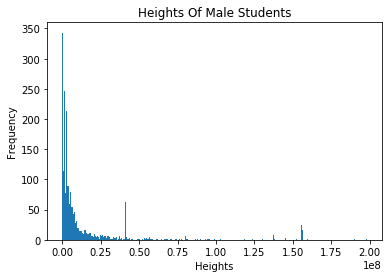

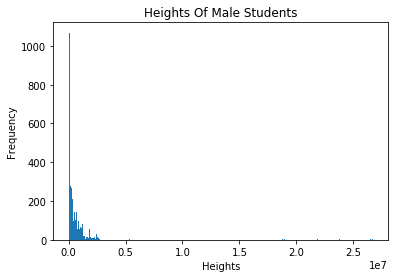

In [62]:
#挑出长度差不多的
test_x=pd.concat([test_x,test_y],axis=1)
test_x_1=test_x[test_x['label']==1]
test_x_0=test_x[test_x['label']==0]
test_x=pd.concat([test_x_1[test_x_1['Length']<100000][test_x_1['Length']>50000],test_x_0[test_x_0['Length']<100000][test_x_0['Length']>50000]])
test_y=test_x.iloc[:,-1]
test_x=test_x.iloc[:,:-1]
from matplotlib import pyplot

#绘制直方图
def drawHist(heights):
    #创建直方图
    #第一个参数为待绘制的定量数据，不同于定性数据，这里并没有事先进行频数统计
    #第二个参数为划分的区间个数
    pyplot.hist(heights, 300)
    pyplot.xlabel('Heights')
    pyplot.ylabel('Frequency')
    pyplot.title('Heights Of Male Students')
    pyplot.show()

drawHist(test_x_1['Length'])
drawHist(test_x_0['Length'])


In [63]:
np.median(test_x_1['Length'])

3405912.0

In [27]:
test_x_1.columns

NameError: name 'test_x_1' is not defined

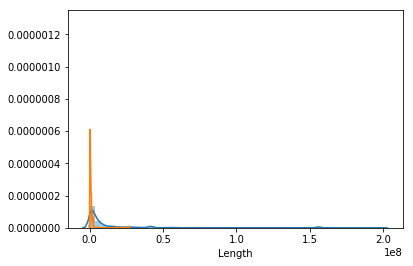

In [70]:
import seaborn as sns
sns.distplot(test_x_1['Length'])
sns.distplot(test_x_0['Length'])

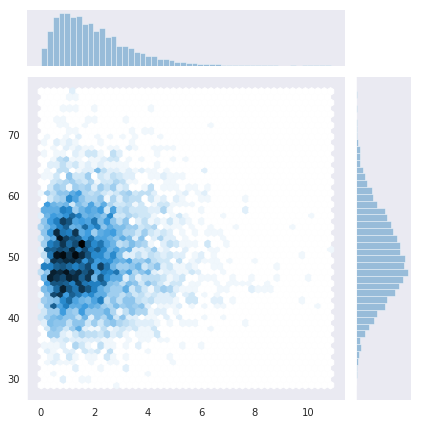

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
x = stats.gamma(2).rvs(5000)
y = stats.gamma(50).rvs(5000)
with sns.axes_style("dark"):
    sns.jointplot(x, y, kind="hex")

In [63]:
import xgboost as xgb
dtrain=xgb.DMatrix(train_x,label=train_y)
dtest=xgb.DMatrix(test_x)
params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth':6,
    'lambda':10,
    'subsample':0.75,
    'colsample_bytree':0.75,
    'min_child_weight':1,
    'eta': 0.07,
    'seed':0,
    'nthread':4,
    'silent':1,
       }
watchlist = [(dtrain,'train')]

bst = xgb.train(params,dtrain,num_boost_round=10,early_stopping_rounds=100,evals=watchlist);  

[0]	train-logloss:0.640277
Will train until train-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.594398
[2]	train-logloss:0.5539
[3]	train-logloss:0.520113
[4]	train-logloss:0.487604
[5]	train-logloss:0.458603
[6]	train-logloss:0.432915
[7]	train-logloss:0.40965
[8]	train-logloss:0.387599
[9]	train-logloss:0.367724


In [64]:
ypred_XGB=bst.predict(dtest)
ypred = (ypred_XGB >= 0.5)*1
from sklearn import metrics
from sklearn.metrics import classification_report
print classification_report(test_y, ypred,labels=[1,0] ,target_names = ['Pathogenic','Benigh'])


             precision    recall  f1-score   support

 Pathogenic       0.95      0.91      0.93      2010
     Benigh       0.94      0.97      0.96      3003

avg / total       0.95      0.95      0.95      5013



In [65]:
%R -i test_y,ypred_XGB

/media/_EXTend2018/Taoyiran/miniconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Type 'citation("pROC")' for a citation.

  warnings.warn(x, RRuntimeWarning)
/media/_EXTend2018/Taoyiran/miniconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
载入程辑包：‘pROC’


  warnings.warn(x, RRuntimeWarning)
/media/_EXTend2018/Taoyiran/miniconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    cov, smooth, var


  warnings.warn(x, RRuntimeWarning)


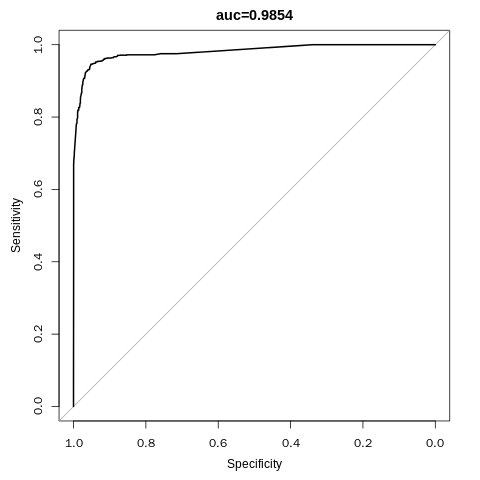

In [66]:
%%R

library(pROC)
rocc<-roc(test_y,ypred_XGB)
plot(rocc,main="auc=0.9854")

In [ ]:

fpr,tpr,threshold = roc_curve(test_y, ypred_XGB) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, 'k--',label='Mean ROC (area = %0.2f)' % roc_auc, lw=2)

In [ ]:
roc_auc

In [ ]:
bst.get_fscore()

Text(0.5,0,'relative importance')

<Figure size 432x288 with 0 Axes>

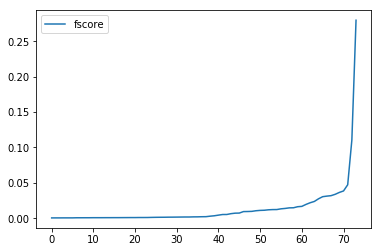

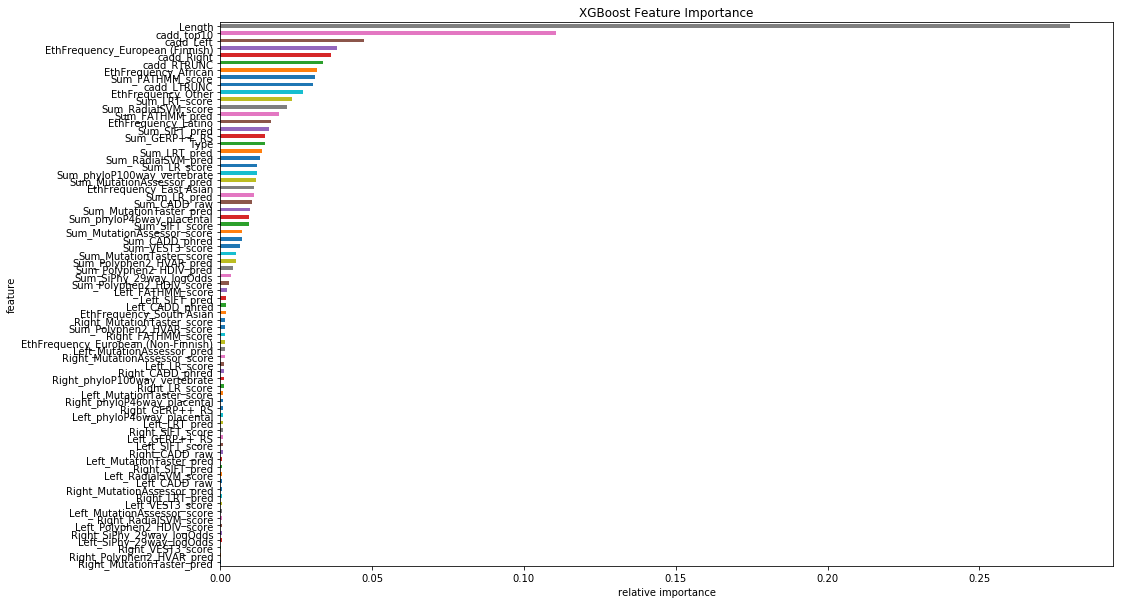

In [60]:
%matplotlib inline 
import operator
from matplotlib import pylab as plt
importance = bst.get_fscore()

importance = sorted(importance.items(), key=operator.itemgetter(1))
importance=[i for i in importance if i[1]>10]

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')